In [86]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [62]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [63]:
grade = data.groupby('grade')

In [64]:
grade.agg(['count','mean','median','std'])['int_rate']

,count,mean,median,std
grade,,,,
A,433027,7.084545,7.24,0.984465
B,663557,10.675806,10.75,1.238302
C,650053,14.143689,13.99,1.251283
D,324424,18.143067,17.99,1.676964
E,135639,21.829653,21.48,2.703925
F,41800,25.454091,24.89,2.928144
G,12168,28.074255,28.18,2.804587


In [108]:
grade.agg(['count','mean','median','std','sum'])['loan_amnt']

,count,mean,median,std,sum
grade,,,,,
A,433027,14603.343210,12000.0,9107.975657,6.323642e+09
B,663557,14173.338199,12000.0,8957.012601,9.404818e+09
C,650053,15038.083318,13000.0,9203.950054,9.775551e+09
D,324424,15711.983007,14400.0,9250.612823,5.097344e+09
E,135639,17453.078392,16000.0,9363.276694,2.367318e+09
F,41800,19124.646531,18175.0,9166.366254,7.994102e+08
G,12168,20383.988741,19800.0,8994.472986,2.480324e+08


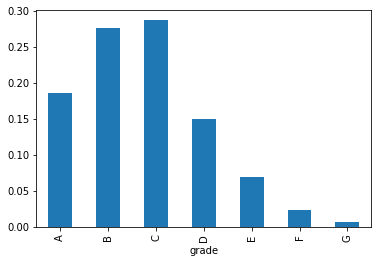

In [107]:
# loan issued amount breakout by grade
grade['loan_amnt'].sum().apply(lambda x: x/sum(data['loan_amnt'])).plot.bar()

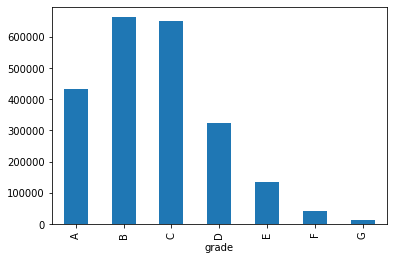

In [114]:
# loan issued count breakout by grade
grade['loan_amnt'].count().apply(lambda x: x/#number of rows).plot.bar()

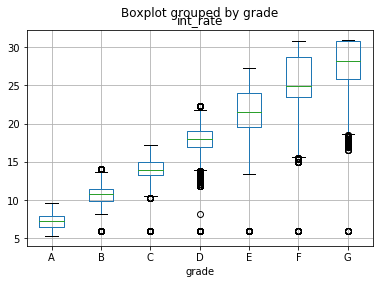

In [112]:
# interest rate and grade boxplot
data[['grade','int_rate']].boxplot(by='grade',column='int_rate')

In [65]:
# 33 rows seem to have missing values across the board- removing those for EDA
#data.isna().sum()

In [66]:
# dropping rows with chronic na issues
data = data.dropna(axis = 0, how = 'all', subset = ['issue_d'])

In [67]:
#convert date issued to date format
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
#convert column from object to date
data['issue_d'] = pd.to_datetime(data['issue_d'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


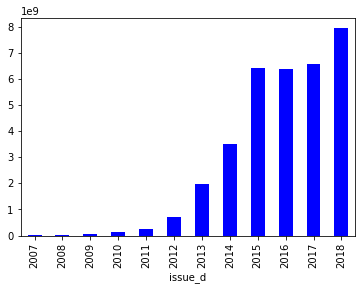

In [88]:
#loan issue amount by year
data.groupby(data.issue_d.dt.year).agg('sum')['loan_amnt'].plot.bar(color = 'b')

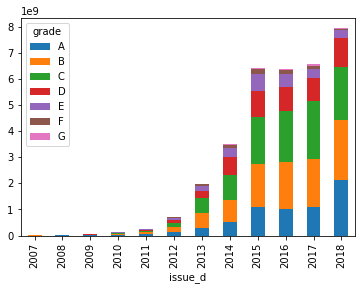

In [100]:
# sum of loan amounts issued by grade by year
data.groupby([data.issue_d.dt.year,'grade'])['loan_amnt'].sum().unstack('grade').plot(kind='bar',stacked = True)

In [126]:
# loan outcomes by percent/grade
status_group = data.loc[data.loan_status!='Current',:].groupby(['grade','loan_status'])['loan_status'].count()
status_group.groupby(level = 0).apply(lambda x: x/float(x.sum()))

grade  loan_status                                        
A      Charged Off                                            0.059797
       Default                                                0.000021
       Does not meet the credit policy. Status:Charged Off    0.000034
       Does not meet the credit policy. Status:Fully Paid     0.000379
       Fully Paid                                             0.930106
       In Grace Period                                        0.002661
       Late (16-30 days)                                      0.001436
       Late (31-120 days)                                     0.005567
B      Charged Off                                            0.131208
       Default                                                0.000017
       Does not meet the credit policy. Status:Charged Off    0.000212
       Does not meet the credit policy. Status:Fully Paid     0.000671
       Fully Paid                                             0.849042
       In Grace Pe